#Import data and Clean the data

In [ ]:
#import the required library
import pandas as pd


In [ ]:
#Load the dataset
df = pd.read_csv('/content/annotations apnea-ecg dataset.csv')

In [ ]:
#Check for information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Record   70 non-null     object 
 1   Length   71 non-null     object 
 2   non-apn  71 non-null     object 
 3   apnea    71 non-null     object 
 4   hours    71 non-null     object 
 5   AI       70 non-null     float64
 6   HI       70 non-null     float64
 7   AHI      70 non-null     float64
 8   Age      70 non-null     float64
 9   Sex      70 non-null     object 
 10  height   71 non-null     object 
 11  weight   71 non-null     object 
dtypes: float64(4), object(8)
memory usage: 6.9+ KB


In [ ]:
#Look into the first 5rows of dataset
df.head()

,Record,Length,non-apn,apnea,hours,AI,HI,AHI,Age,Sex,height,weight
0,NaN,minutes,minutes,minutes,w/apnea,NaN,NaN,NaN,NaN,NaN,(cm),(kg)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a01,490,20,470,9,12.5,57.1,69.6,51.0,M,175,102
3,a02,529,109,420,9,57.2,12.3,69.5,38.0,M,180,120
4,a03,520,274,246,9,38.4,0.7,39.1,54.0,M,168,80


In [ ]:
#Rename the few columns
df = pd.DataFrame.rename(df, columns={'Length' : 'Length(minutes)' , 'non-apn' : 'non-apn(minutes)', 'apnea' : 'apnea(minutes)', 'hours' :'hours w/apnea' , 'height' : 'height(cm)', 'weight' : 'weight(kg)' })
df

,Record,Length(minutes),non-apn(minutes),apnea(minutes),hours w/apnea,AI,HI,AHI,Age,Sex,height(cm),weight(kg)
0,NaN,minutes,minutes,minutes,w/apnea,NaN,NaN,NaN,NaN,NaN,(cm),(kg)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a01,490,20,470,9,12.50,57.1,69.60,51.0,M,175,102
3,a02,529,109,420,9,57.20,12.3,69.50,38.0,M,180,120
4,a03,520,274,246,9,38.40,0.7,39.10,54.0,M,168,80
...,...,...,...,...,...,...,...,...,...,...,...,...
67,x31,558,42,516,10,86.80,6.7,93.50,29.0,F,183,100
68,x32,539,114,425,9,63.30,8.5,71.80,29.0,F,183,100
69,x33,474,471,3,0,0.13,0.0,0.13,28.0,F,169,57
70,x34,476,472,4,0,0.38,0.0,0.38,30.0,F,168,56


In [ ]:
#Drop the the unnecessary rows and reset the index
df1 =df.drop([df.index[0] , df.index[1]],inplace = True)
df1 = df.reset_index(drop=True)
df1

,Record,Length(minutes),non-apn(minutes),apnea(minutes),hours w/apnea,AI,HI,AHI,Age,Sex,height(cm),weight(kg)
0,a01,490,20,470,9,12.50,57.1,69.60,51.0,M,175,102
1,a02,529,109,420,9,57.20,12.3,69.50,38.0,M,180,120
2,a03,520,274,246,9,38.40,0.7,39.10,54.0,M,168,80
3,a04,493,40,453,9,73.40,4.0,77.40,52.0,M,173,121
4,a05,455,179,276,8,35.00,6.0,41.00,58.0,M,176,78
...,...,...,...,...,...,...,...,...,...,...,...,...
65,x31,558,42,516,10,86.80,6.7,93.50,29.0,F,183,100
66,x32,539,114,425,9,63.30,8.5,71.80,29.0,F,183,100
67,x33,474,471,3,0,0.13,0.0,0.13,28.0,F,169,57
68,x34,476,472,4,0,0.38,0.0,0.38,30.0,F,168,56


In [ ]:
#check for the information again
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Record            70 non-null     object 
 1   Length(minutes)   70 non-null     object 
 2   non-apn(minutes)  70 non-null     object 
 3   apnea(minutes)    70 non-null     object 
 4   hours w/apnea     70 non-null     object 
 5   AI                70 non-null     float64
 6   HI                70 non-null     float64
 7   AHI               70 non-null     float64
 8   Age               70 non-null     float64
 9   Sex               70 non-null     object 
 10  height(cm)        70 non-null     object 
 11  weight(kg)        70 non-null     object 
dtypes: float64(4), object(8)
memory usage: 6.7+ KB


In [ ]:
 #Convert the datatypes of required features from objects to float64 
 df1[['Length(minutes)','non-apn(minutes)','apnea(minutes)','hours w/apnea',
            'height(cm)','weight(kg)']] = df1[['Length(minutes)','non-apn(minutes)','apnea(minutes)','hours w/apnea',
            'height(cm)','weight(kg)']].astype(float,errors = 'raise')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Record            70 non-null     object 
 1   Length(minutes)   70 non-null     float64
 2   non-apn(minutes)  70 non-null     float64
 3   apnea(minutes)    70 non-null     float64
 4   hours w/apnea     70 non-null     float64
 5   AI                70 non-null     float64
 6   HI                70 non-null     float64
 7   AHI               70 non-null     float64
 8   Age               70 non-null     float64
 9   Sex               70 non-null     object 
 10  height(cm)        70 non-null     float64
 11  weight(kg)        70 non-null     float64
dtypes: float64(10), object(2)
memory usage: 6.7+ KB


In [ ]:
#Create a new column: Patient_status based on the criteria AHI>5 is a sleepapnea patient
df1.loc[df1['AHI'] > 5 ,'Patient_status'] = 'Patient'
df1.loc[df1['AHI'] < 5 ,'Patient_status'] = 'Healthy'

In [ ]:
#Print all records with new column: Patient_status
df1

,Record,Length(minutes),non-apn(minutes),apnea(minutes),hours w/apnea,AI,HI,AHI,Age,Sex,height(cm),weight(kg),Patient_status
0,a01,490.0,20.0,470.0,9.0,12.50,57.1,69.60,51.0,M,175.0,102.0,Patient
1,a02,529.0,109.0,420.0,9.0,57.20,12.3,69.50,38.0,M,180.0,120.0,Patient
2,a03,520.0,274.0,246.0,9.0,38.40,0.7,39.10,54.0,M,168.0,80.0,Patient
3,a04,493.0,40.0,453.0,9.0,73.40,4.0,77.40,52.0,M,173.0,121.0,Patient
4,a05,455.0,179.0,276.0,8.0,35.00,6.0,41.00,58.0,M,176.0,78.0,Patient
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,x31,558.0,42.0,516.0,10.0,86.80,6.7,93.50,29.0,F,183.0,100.0,Patient
66,x32,539.0,114.0,425.0,9.0,63.30,8.5,71.80,29.0,F,183.0,100.0,Patient
67,x33,474.0,471.0,3.0,0.0,0.13,0.0,0.13,28.0,F,169.0,57.0,Healthy
68,x34,476.0,472.0,4.0,0.0,0.38,0.0,0.38,30.0,F,168.0,56.0,Healthy


#Descriptive statistics of ECG Database records:

In [ ]:
#import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Get descriptive statistics of  dataset
df1.describe()

,Length(minutes),non-apn(minutes),apnea(minutes),hours w/apnea,AI,HI,AHI,Age,height(cm),weight(kg)
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,491.828571,305.171429,186.657143,5.085714,21.858000,6.189571,28.047571,45.142857,175.842857,86.757143
std,31.576441,156.571692,172.275385,3.899992,24.101227,9.423092,27.537779,10.837784,5.588901,20.730455
min,401.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,158.000000,53.000000
25%,470.250000,180.750000,3.250000,0.000000,0.030000,0.000000,0.130000,38.000000,171.500000,69.750000
50%,496.000000,320.500000,178.000000,6.500000,14.200000,3.500000,21.000000,44.000000,177.000000,85.000000
75%,511.000000,453.250000,323.500000,9.000000,34.750000,8.900000,42.750000,53.750000,179.750000,102.000000
max,578.000000,535.000000,534.000000,10.000000,86.800000,57.100000,93.500000,63.000000,184.000000,135.000000


In [ ]:
#Count for both categories of the Patient_status
Patient_count = df1['Patient_status'].value_counts()
Patient_count

Patient    45
Healthy    23
Name: Patient_status, dtype: int64

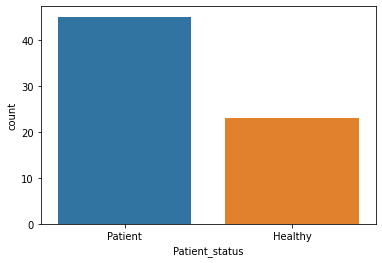

In [ ]:
#Plot for both categories of patient_status 
sns.countplot(data=df1, x='Patient_status')

In [ ]:
#Count for both categories of patient_status based on sex
df1.groupby('Sex')['Patient_status'].value_counts()

Sex  Patient_status
F    Healthy           11
     Patient            2
M    Patient           43
     Healthy           12
Name: Patient_status, dtype: int64

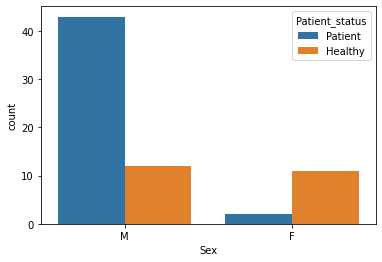

In [ ]:
#Plot for both categories of patient_status based on sex
sns.countplot(data=df1, x='Sex',hue='Patient_status')

In [ ]:
#Count for both categories of patient_status based on age
df1.groupby('Patient_status')['Age'].value_counts()

Patient_status  Age 
Healthy         27.0    4
                31.0    4
                28.0    3
                30.0    2
                37.0    2
                39.0    2
                41.0    2
                42.0    2
                44.0    2
Patient         51.0    5
                58.0    5
                44.0    4
                52.0    4
                53.0    4
                55.0    4
                60.0    3
                29.0    2
                38.0    2
                40.0    2
                43.0    2
                54.0    2
                57.0    2
                63.0    2
                39.0    1
                46.0    1
Name: Age, dtype: int64

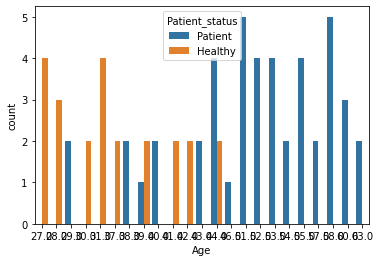

In [ ]:
#Plot for both categories of patient_status based on Age
sns.countplot(data=df1, x='Age',hue='Patient_status')

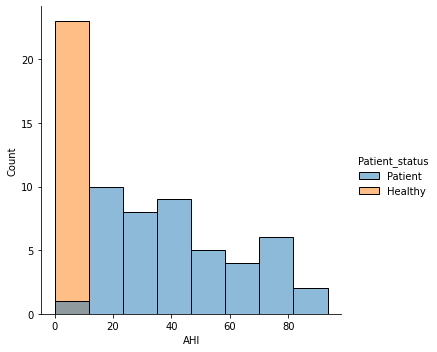

In [ ]:
#Plot for both categories of patient_status based on AHI
sns.displot(data=df1, x='AHI',hue='Patient_status')

Distribution plot is not showing Normal distribution. After further checking with P-value might have to consider Mannwhitney U-test. 

#Inferential Statistics of ECG Database records:

Null Hypothesis is Patient is equal to Healthy

Alternative hypothesis is Patient is not equal to Healthy

Significance level is 0.05

Variable input is Binary as Patient and Healthy

The variable response is 'AHI' is continuous value.

Responses are not paired by the groups, they are independent groups.

It's alterative is two tailed.

Normal distribution is not showing up in the plot.


In [ ]:
#import required libraries and Locate all Patients of the dataset and show descriptive stats
import scipy.stats as stats
Patient = df1.loc[(df1.Patient_status == 'Patient')]
Patient.describe()


,Length(minutes),non-apn(minutes),apnea(minutes),hours w/apnea,AI,HI,AHI,Age,height(cm),weight(kg)
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,506.377778,219.044444,287.333333,7.733333,33.880000,9.486667,43.366667,50.533333,176.088889,95.600000
std,23.436848,128.965985,132.063174,1.863525,22.290383,10.379889,22.718895,8.231315,3.697802,14.581121
min,442.000000,11.000000,57.000000,3.000000,1.800000,0.000000,10.000000,29.000000,167.000000,69.000000
25%,496.000000,115.000000,200.000000,7.000000,16.600000,4.000000,24.000000,44.000000,176.000000,85.000000
50%,510.000000,196.000000,292.000000,9.000000,32.000000,6.900000,41.000000,52.000000,177.000000,96.000000
75%,518.000000,305.000000,383.000000,9.000000,48.000000,10.400000,63.000000,57.000000,178.000000,105.000000
max,578.000000,471.000000,534.000000,10.000000,86.800000,57.100000,93.500000,63.000000,183.000000,131.000000


In [ ]:
#Find P-value for Patient
stats.shapiro(Patient['AHI'])

(0.9376929402351379, 0.01770780049264431)

Result showing P-value is 0.017 which is less than 0.05, I can reject the null hypothesis. No normality present in the variable.

In [ ]:
#import required libraries and Locate all Healthy people of the dataset and show descriptive stats
import scipy.stats as stats
Healthy = df1.loc[(df1.Patient_status == 'Healthy')]
Healthy.describe()

,Length(minutes),non-apn(minutes),apnea(minutes),hours w/apnea,AI,HI,AHI,Age,height(cm),weight(kg)
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,467.347826,464.478261,2.869565,0.173913,0.063478,0.016087,0.079565,34.000000,175.000000,65.260870
std,27.659634,28.181021,4.683669,0.491026,0.163752,0.056788,0.170919,6.274045,8.257228,8.247409
min,401.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,158.000000,53.000000
25%,454.500000,452.500000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,169.500000,60.000000
50%,469.000000,468.000000,1.000000,0.000000,0.000000,0.000000,0.000000,31.000000,180.000000,65.000000
75%,483.000000,482.000000,3.000000,0.000000,0.000000,0.000000,0.065000,40.000000,182.000000,69.000000
max,535.000000,535.000000,19.000000,2.000000,0.700000,0.250000,0.700000,44.000000,184.000000,83.000000


In [ ]:
#Find P-value for Healthy
stats.shapiro(Healthy['AHI'])

(0.5502163171768188, 2.6835161293092824e-07)

Result showing P-value is less than 0.05, I can reject the null hypothesis. No normality present in the variable.

Since the P-value is less than 0.05 and no normality we should use Non-parametric testing Ex: Mannwhitney U-test

In [ ]:
#Perform non parametric testing: Mannwhitney U-test with alternative as two sided.
stats.mannwhitneyu(Patient['AHI'],Healthy['AHI'],alternative='two-sided')


MannwhitneyuResult(statistic=1035.0, pvalue=1.4201254885439097e-11)

P-value < 0.05. So I can conclude that we can reject the null hypothesis and AHI is not same in Patient and Healthy inputs. There is a difference present in between. 